In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import warnings
warnings.filterwarnings('ignore')

In [2]:
#based on https://www.kaggle.com/code/kanncaa1/deep-learning-tutorial-for-beginners

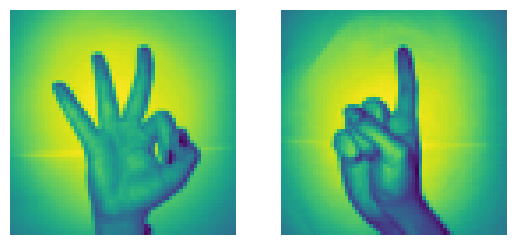

In [3]:
X1 = np.load('X.npy')
Y1 = np.load('Y.npy')

img_size = 64

plt.subplot(1, 2, 1)
plt.imshow(X1[111].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X1[888].reshape(img_size, img_size))
plt.axis('off')
plt.show()


In [4]:
#join the sequences of arrays along an existing row axis
X = np.concatenate((X1[204:409], X1[822:1027] ), axis=0)
Z = np.zeros(205)
O = np.ones(205)
Y = np.concatenate((Z, O), axis=0).reshape(X.shape[0],1)
print("X shape: " + str(X.shape))
print("Y shape: " + str(Y.shape))


X shape: (410, 64, 64)
Y shape: (410, 1)


In [5]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y,test_size=0.2, random_state=42)
train_number = X_train.shape[0]
test_number = X_test.shape[0]
print("Number of training examples: ", train_number)
print("Number of testing examples: ", test_number)


Number of training examples:  328
Number of testing examples:  82


In [6]:
X_train_flatten = X_train.reshape(train_number,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(test_number,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (328, 4096)
X test flatten (82, 4096)


In [7]:
X_train = X_train_flatten.T
y_train = y_train.T
X_test = X_test_flatten.T
y_test = y_test.T
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(4096, 328)
(1, 328)
(4096, 82)
(1, 82)


In [8]:
def dummy(param):
    dummy_param = param + 4
    return dummy_param
result = dummy(6)

def weights_and_biasaes(shape):
    w = np.full((shape, 1), 0.01)
    b = 0.0
    return w, b


In [9]:
w, b = weights_and_biasaes(4096)

In [10]:
z = np.dot(w.T, X_train) + b
def sigmoid(z):
    y_hat = 1/(1+np.exp(-z))
    return y_hat

In [11]:
y_hat = sigmoid(0)
print(y_hat)


0.5


In [12]:
def forward_prop(w, b, X_train, y_train):
    z = np.dot(w.T, X_train) + b
    y_hat = sigmoid(z)
    loss = -y_train * np.log(y_hat) - (1 - y_train) * np.log(1 - y_hat)
    cost = (np.sum(loss)) / X_train.shape[1]
    return cost, y_hat


In [13]:
def forward_backward_propagation(w, b, X_train, y_train):
    # Forward propagation
    z = np.dot(w.T, X_train) + b
    y_hat = sigmoid(z)
    loss = -y_train * np.log(y_hat) - (1 - y_train) * np.log(1 - y_hat)
    cost = (np.sum(loss))/X_train.shape[1]
    
    # Backward propagation
    derivative_weight = (np.dot(X_train,((y_hat-y_train).T)))/X_train.shape[1]
    derivative_bias = np.sum(y_hat-y_train)/X_train.shape[1]
    
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [14]:
def update(w, b, X_train, y_train, learning_rate, iter_no):
    cost_list = []
    cost_list2 = []
    index = []
    for i in range(iter_no):
        cost, gradients = forward_backward_propagation(w, b, X_train, y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" % (i, cost))
    params = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return params, gradients, cost_list
    

In [15]:
def predict(w, b, X_test):
    z = sigmoid(np.dot(w.T, X_test) + b)
    Y_prediction = np.zeros((1, X_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    return Y_prediction

Cost after iteration 0: 14.162303


Cost after iteration 10: 1.008001
Cost after iteration 20: 0.933437
Cost after iteration 30: 0.853554
Cost after iteration 40: 0.771101
Cost after iteration 50: 0.687030
Cost after iteration 60: 0.602989
Cost after iteration 70: 0.521999
Cost after iteration 80: 0.449661
Cost after iteration 90: 0.394877
Cost after iteration 100: 0.363635
Cost after iteration 110: 0.347916
Cost after iteration 120: 0.336629
Cost after iteration 130: 0.326566
Cost after iteration 140: 0.317356


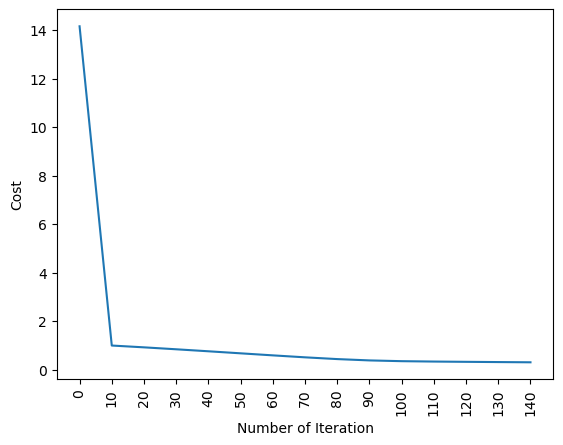

train accuracy: 92.98780487804878 %
test accuracy: 92.6829268292683 %


In [16]:
def log_reg(X_train, y_train, X_test, y_test, learning_rate, iter_no):
    shape = X_train.shape[0]
    w, b = weights_and_biasaes(shape)
    params, gradients, cost_list = update(w, b, X_train, y_train, learning_rate, iter_no)

    y_pred_test = predict(params["weight"], params["bias"], X_test)
    y_pred_train = predict(params["weight"], params["bias"], X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

log_reg(X_train, y_train, X_test, y_test, 0.005, 150)

In [17]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# Logistic Regression
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
logreg.fit(X_train.T, y_train.T)
y_pred = logreg.predict(X_test.T)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test.T, y_test.T)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train.T, y_train.T)))

Accuracy of logistic regression classifier on test set: 0.98
Accuracy of logistic regression classifier on train set: 1.00


In [18]:
#artificial neural network

def init_params_and_layer_NN(X_train, y_train):
    params = {"weight1": np.random.randn(3,X_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return params

In [19]:
def forward_prop_NN(X_train, params):
    Z1 = np.dot(params['weight1'], X_train) + params['bias1']
    A1 = np.tanh(Z1)
    Z2 = np.dot(params['weight2'], A1) + params['bias2']
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

    return A2, cache

In [20]:
def compute_cost_NN(A2, Y, params):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [21]:
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [22]:
def update_params_NN(params, grads, learning_rate=0.01):
    params["weight1"] -= learning_rate * grads["dweight1"]
    params["bias1"] -= learning_rate * grads["dbias1"]
    params["weight2"] -= learning_rate * grads["dweight2"]
    params["bias2"] -= learning_rate * grads["dbias2"]
    return params

In [23]:
def pred_NN(params, X_test):
    A2, cache = forward_prop_NN(X_test, params)
    Y_pred_nn = np.zeros((1, X_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0, i] <= 0.5:
            Y_pred_nn[0, i] = 0
        else:
            Y_pred_nn[0, i] = 1
            
    return Y_pred_nn
    

In [24]:
def two_layer_NN(X_train, y_train, X_test, y_test, iter_no):
    cost_list = []
    index_list = []

    # Initialize the parameters
    params = init_params_and_layer_NN(X_train, y_train)

    for i in range(0, iter_no):
        A2, cache = forward_prop_NN(X_train, params)
        cost = compute_cost_NN(A2, y_train, params)
        grads = backward_propagation_NN(params, cache, X_train, y_train)
        params = update_params_NN(params, grads)

        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print("Cost after iteration %i: %f" % (i, cost))

    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.show()

    y_pred_test = pred_NN(params, X_test)
    y_pred_train = pred_NN(params, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    return params

Cost after iteration 0: 0.417143
Cost after iteration 100: 0.371615
Cost after iteration 200: 0.355655
Cost after iteration 300: 0.349909
Cost after iteration 400: 0.347815
Cost after iteration 500: 0.347047
Cost after iteration 600: 0.346764
Cost after iteration 700: 0.346658
Cost after iteration 800: 0.346618
Cost after iteration 900: 0.346602
Cost after iteration 1000: 0.346594
Cost after iteration 1100: 0.346591
Cost after iteration 1200: 0.346588
Cost after iteration 1300: 0.346586
Cost after iteration 1400: 0.346583
Cost after iteration 1500: 0.346581
Cost after iteration 1600: 0.346578
Cost after iteration 1700: 0.346576
Cost after iteration 1800: 0.346584
Cost after iteration 1900: 0.346722
Cost after iteration 2000: 0.356164
Cost after iteration 2100: 0.340547
Cost after iteration 2200: 0.304805
Cost after iteration 2300: 0.262283
Cost after iteration 2400: 0.223839
Cost after iteration 2500: 0.191839
Cost after iteration 2600: 0.163182
Cost after iteration 2700: 0.142499
Cost

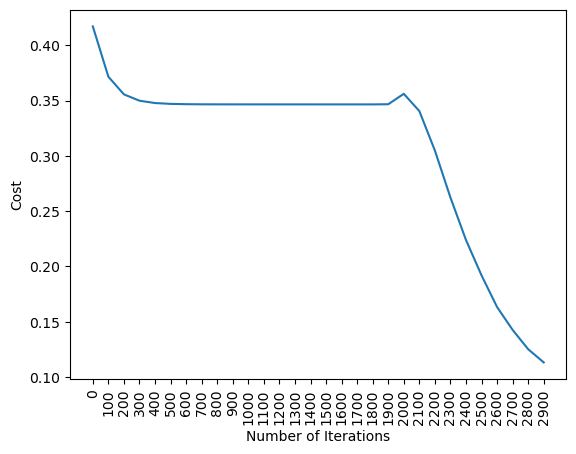

train accuracy: 97.5609756097561 %
test accuracy: 97.5609756097561 %


In [25]:
params = two_layer_NN(X_train, y_train, X_test, y_test, iter_no=3000)

In [26]:
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T

In [27]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
7/7 [==============================] - 12s 3ms/step - loss: 0.6928 - accuracy: 0.5092
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5956
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.8642
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.8534
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.7848
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.8948
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.8832
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.8751
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.8823
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.9396
Epoch 11/100
7/7 [==========

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming your input shape is (4096,)
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4096,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with appropriate loss and optimizer for your problem
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with your data
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
11/11 [==============================] - 0s 12ms/step - loss: 0.7820 - accuracy: 0.5488 - val_loss: 0.6866 - val_accuracy: 0.5000
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 0.6244 - accuracy: 0.6128 - val_loss: 0.5362 - val_accuracy: 0.8659
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 0.4977 - accuracy: 0.7683 - val_loss: 0.4588 - val_accuracy: 0.9146
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: 0.4170 - accuracy: 0.8476 - val_loss: 0.4032 - val_accuracy: 0.8780
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.8841 - val_loss: 0.3394 - val_accuracy: 0.9268
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 0.2811 - accuracy: 0.9177 - val_loss: 0.2933 - val_accuracy: 0.9268
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 0.2641 - accuracy: 0.9116 - val_loss: 0.2552 - val_accuracy: 0.9268
Epoch 8/10
11/11 [=

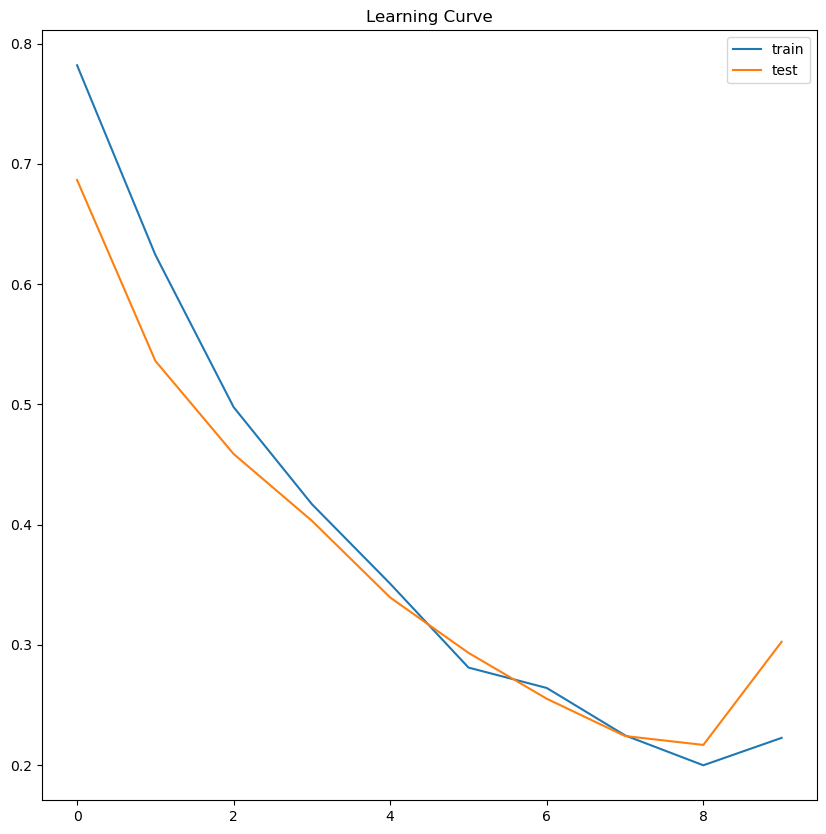

In [56]:
#visualise the learning curve
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Learning Curve')
plt.legend()
plt.show()


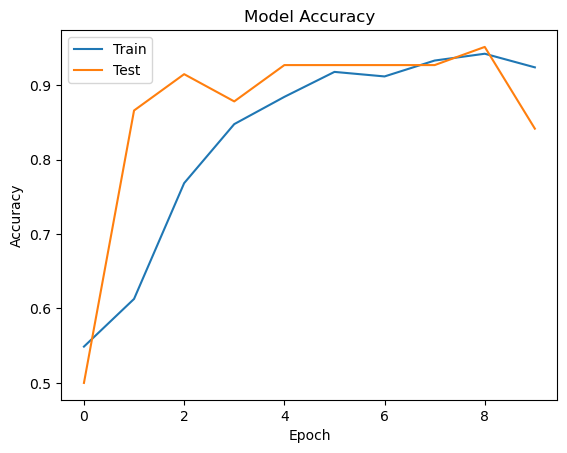

In [57]:
#visualize the accuracy and loss of the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

